<a href="https://colab.research.google.com/github/rubencg195/ML_Course_6915/blob/master/Assignment_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!wget "http://ufldl.stanford.edu/housenumbers/train_32x32.mat" 

--2019-03-11 19:58:52--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.2’

train_32x32.mat.2   100%[===================>] 173.61M  12.5MB/s    in 14s     

2019-03-11 19:59:06 (12.0 MB/s) - ‘train_32x32.mat.2’ saved [182040794/182040794]



In [56]:
!wget "http://ufldl.stanford.edu/housenumbers/test_32x32.mat" 

--2019-03-11 19:59:08--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat.2’

test_32x32.mat.2    100%[===================>]  61.30M  44.0MB/s    in 1.4s    

2019-03-11 19:59:10 (44.0 MB/s) - ‘test_32x32.mat.2’ saved [64275384/64275384]



In [57]:
!wget "http://ufldl.stanford.edu/housenumbers/extra_32x32.mat" 

--2019-03-11 19:59:11--  http://ufldl.stanford.edu/housenumbers/extra_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1329278602 (1.2G) [text/plain]
Saving to: ‘extra_32x32.mat.2’

extra_32x32.mat.2   100%[===================>]   1.24G  93.3MB/s    in 20s     

2019-03-11 19:59:32 (62.3 MB/s) - ‘extra_32x32.mat.2’ saved [1329278602/1329278602]



In [58]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [0]:
from scipy.io import loadmat

train_set = loadmat('train_32x32.mat')
test_set = loadmat('test_32x32.mat')

train_images = np.array(train_set["X"])
train_labels = np.array(train_set["y"])

test_images = np.array(test_set["X"])
test_labels = np.array(test_set["y"])

In [60]:
#train_images.shape
train_labels.shape

(73257, 1)

In [61]:
train_temp = list()
test_temp = list()
for i in range(train_labels.shape[0]):
  train_temp.append(train_images[:,:,:,i])
for i in range(test_labels.shape[0]):
  test_temp.append(test_images[:,:,:,i])
train_images = np.array(train_temp)
test_images  = np.array(test_temp)
train_images.shape


(73257, 32, 32, 3)

In [62]:
train_labels.shape

(73257, 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


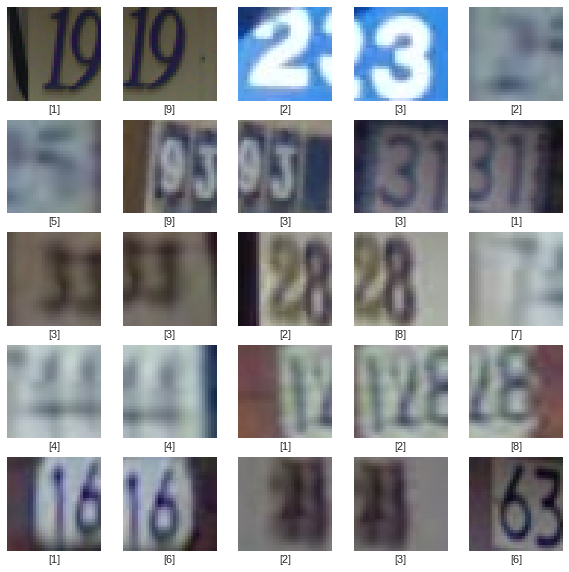

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(11, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
73257/73257 [==============================] - 33s 457us/sample - loss: 14.2486 - acc: 0.1160
Epoch 2/20
73257/73257 [==============================] - 34s 462us/sample - loss: 14.2486 - acc: 0.1160
Epoch 3/20
62944/73257 [========================>.....] - ETA: 4s - loss: 14.2439 - acc: 0.1163

In [0]:
model.evaluate(test_images, test_labels)

In [0]:
predictions = model.predict(test_images)